In [36]:
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon, rescale
from scipy.signal import correlate
import matplotlib.pyplot as plt
import numpy as np
from torch.fft import fftn

In [ ]:
plt.ion()

1.524427305404581
1.5244263319347136
1.524425769494128
1.5244253998962949


Text(0.5, 1.0, 'correction')

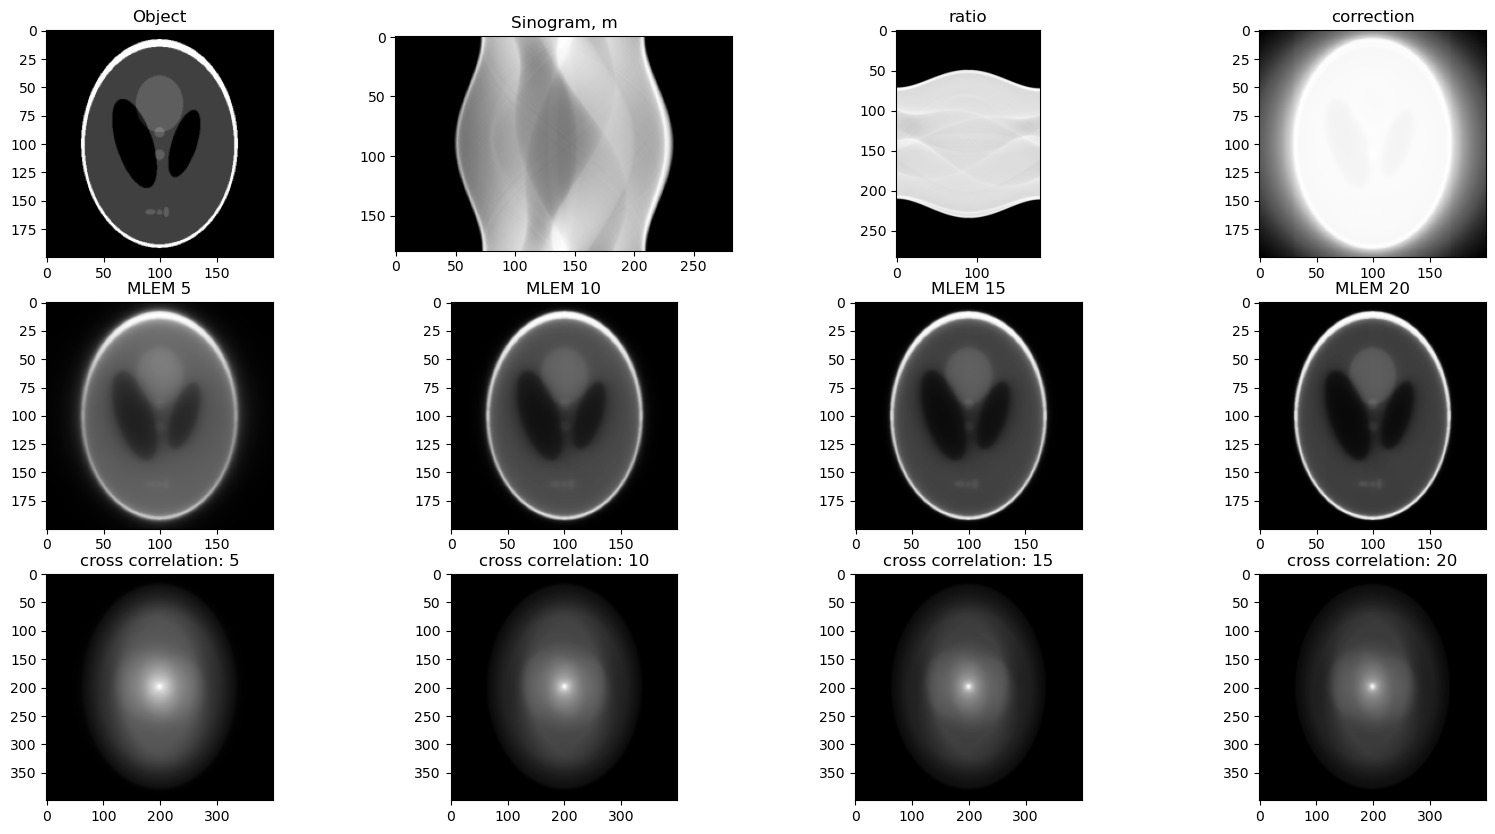

In [41]:
true_object = shepp_logan_phantom()
activity_level = 0.1
true_object = rescale(activity_level * true_object, 0.5)
fig, axs = plt.subplots(3,4, figsize = (20,10))
axs[0,0].imshow(true_object, cmap = 'Greys_r')
axs[0,0].set_title('Object')


#gernerate simulated sinogram data
azi_angles = np.linspace(0, 180, 180)
sinogram = radon(true_object, azi_angles, circle = False)
axs[0,1].imshow(sinogram.T, cmap = 'Greys_r')
axs[0,1].set_title('Sinogram, m')

#initializing with x^0
mlem_rec = np.ones(true_object.shape)
sino_ones = np.ones(sinogram.shape)
sense_image = iradon(sino_ones, azi_angles, circle = False, filter_name = None)


for i in range(20+1):
    fp = radon(mlem_rec, azi_angles, circle = False) #forward projection 
    ratio = sinogram / (fp + 0.000001) #safety term for small values
    correction = iradon(ratio, azi_angles, circle = False, filter_name = None) / sense_image
    mlem_rec = mlem_rec * correction
    if i in [5, 10, 15, 20]:
        print(np.mean(correlate(mlem_rec, true_object, mode = 'full', method = 'fft')))

        #print(np.sum(correlate(fftn(mlem_rec), fftn(true_object), mode = 'full', method = 'direct')))
        axs[1,int((i-5)/5)].imshow(mlem_rec, cmap = 'Greys_r')
        axs[1,int((i-5)/5)].set_title(f'MLEM %d' %(i))
        axs[2,int((i-5)/5)].imshow(correlate(mlem_rec, true_object, mode = 'full', method = 'fft'), cmap = 'Greys_r')
        axs[2,int((i-5)/5)].set_title(f'cross correlation: %d' %(i))

axs[0,2].imshow(ratio, cmap = 'Greys_r')
axs[0,2].set_title('ratio')

axs[0,3].imshow(correction, cmap = 'Greys_r')
axs[0,3].set_title('correction')




# Playing with the 'safety term'

/var/folders/mb/wdn8tlwj21l0dcgn8cvg5k240000gn/T/ipykernel_15090/3151370863.py:24: RuntimeWarning: invalid value encountered in divide
  ratio = sinogram / (fp + 0.000001 * j**10) #safety term for small values


0
1
2
3
4
5


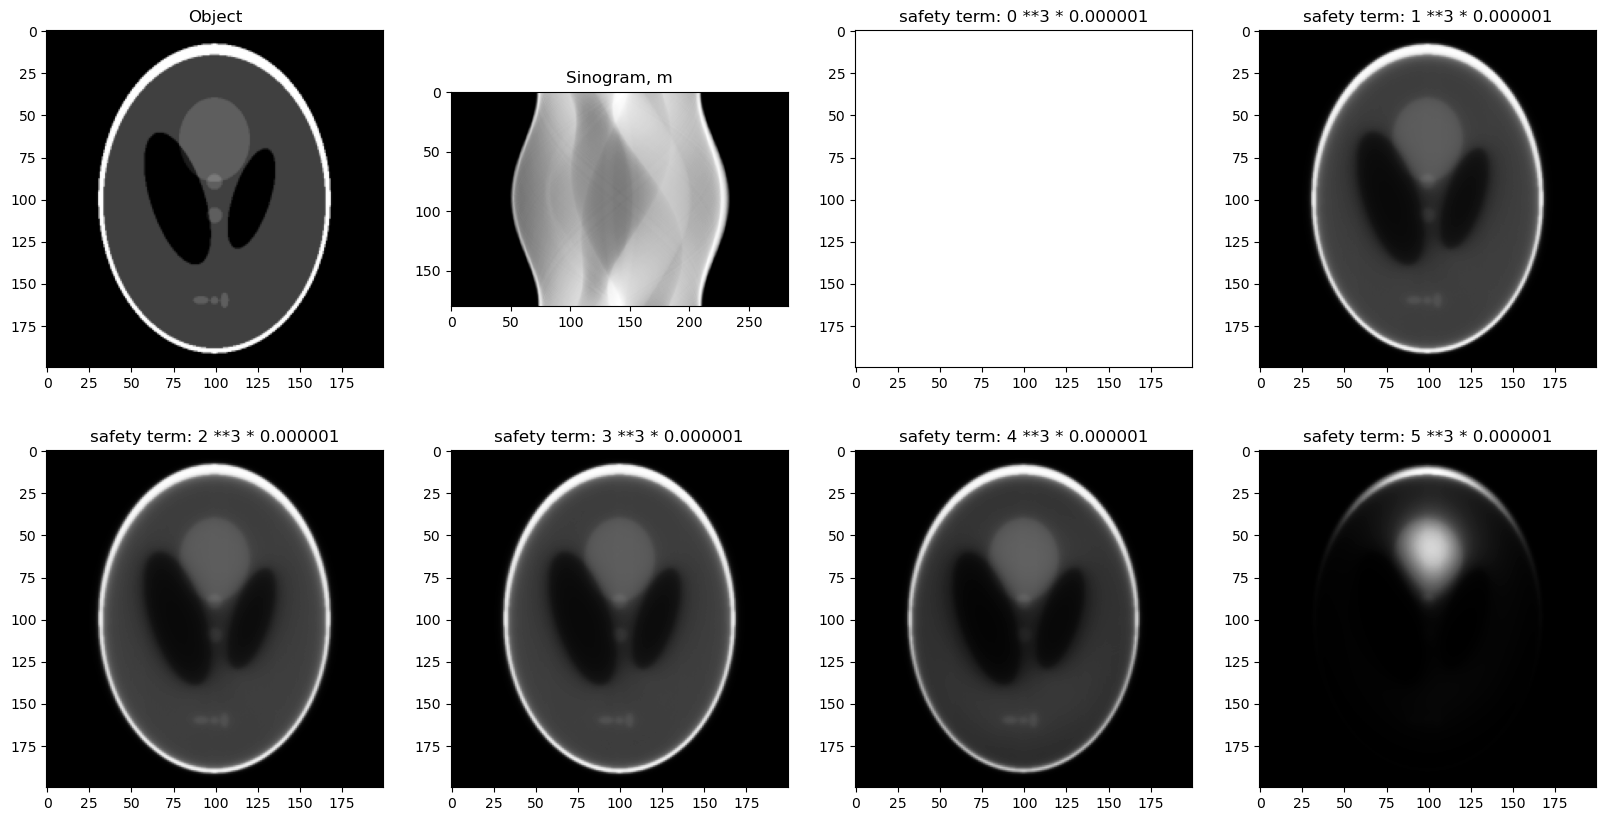

In [31]:
true_object = shepp_logan_phantom()
activity_level = 0.1
true_object = rescale(activity_level * true_object, 0.5)
fig, axs = plt.subplots(2,4, figsize = (20,10))
axs[0,0].imshow(true_object, cmap = 'Greys_r')
axs[0,0].set_title('Object')


#gernerate simulated sinogram data
azi_angles = np.linspace(0, 180, 180)
sinogram = radon(true_object, azi_angles, circle = False)
axs[0,1].imshow(sinogram.T, cmap = 'Greys_r')
axs[0,1].set_title('Sinogram, m')

#initializing with x^0
mlem_rec = np.ones(true_object.shape)
sino_ones = np.ones(sinogram.shape)
sense_image = iradon(sino_ones, azi_angles, circle = False, filter_name = None)

for j in range(6):
    mlem_rec = np.ones(true_object.shape)
    for i in range(20+1):
        fp = radon(mlem_rec, azi_angles, circle = False) #forward projection 
        ratio = sinogram / (fp + 0.000001 * j**10) #safety term for small values
        correction = iradon(ratio, azi_angles, circle = False, filter_name = None) / sense_image
        mlem_rec = mlem_rec * correction
    print(j)    
    axs.flat[2+j].imshow(mlem_rec, cmap = 'Greys_r')
    axs.flat[2+j].set_title(f'safety term: %d **3 * 0.000001' %(j))


